In [45]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  


In [46]:
train=pd.read_csv("titanic dataset.csv")

In [47]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [48]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


<AxesSubplot:>

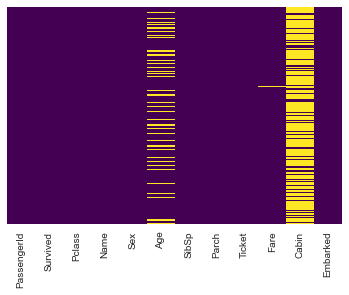

In [49]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")

<AxesSubplot:xlabel='Survived', ylabel='count'>

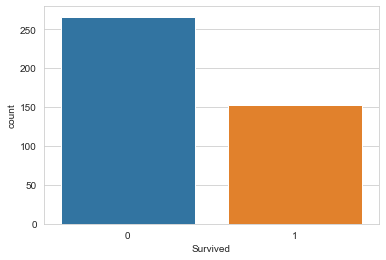

In [50]:
sns.set_style('whitegrid')
sns.countplot(x="Survived",data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

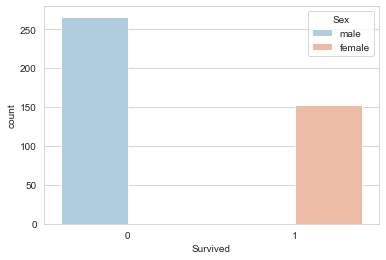

In [51]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette="RdBu_r")

<AxesSubplot:xlabel='Survived', ylabel='count'>

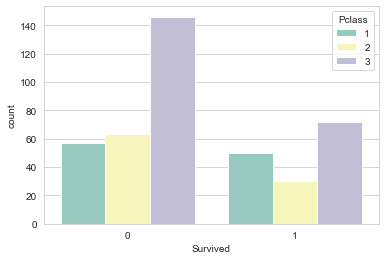

In [52]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='Set3')

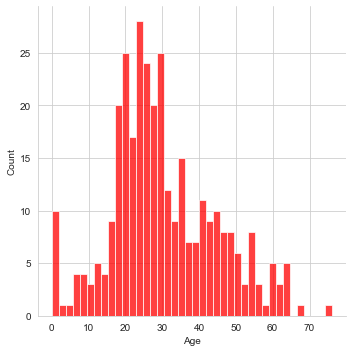

In [53]:
sns.displot(train['Age'].dropna(),kde=False,color='red',bins=40)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

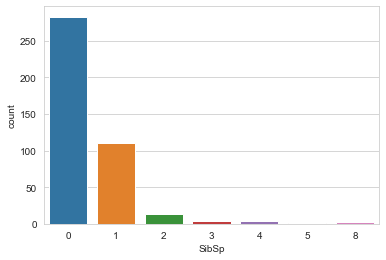

In [54]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:>

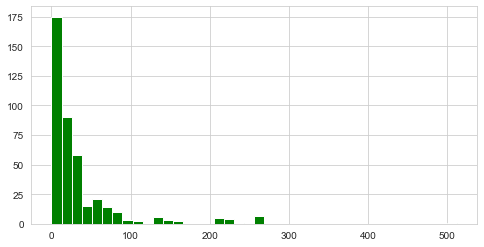

In [55]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

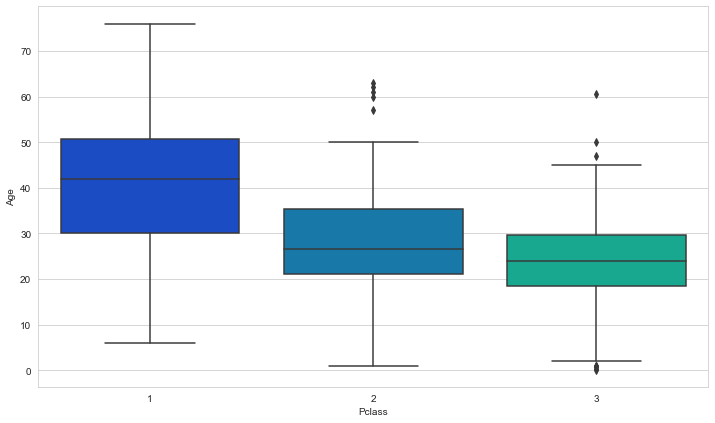

In [56]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [57]:
def input_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1 :
            return 42
        
        elif Pclass==2:
            return 28
          
         
        else: 
             return 24
    else:
                return Age
       
       
           
            

    

In [58]:
train['Age']=train[['Age','Pclass']].apply(input_age,axis=1)

<AxesSubplot:>

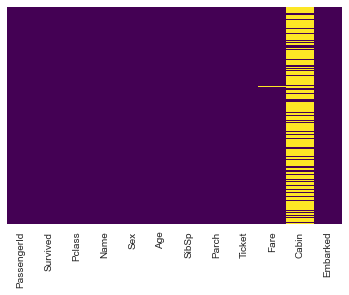

In [59]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [60]:
train.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

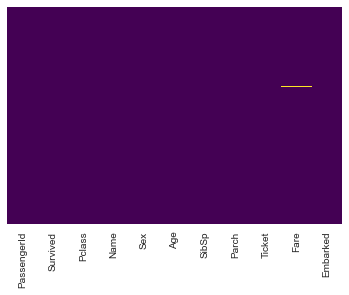

In [61]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

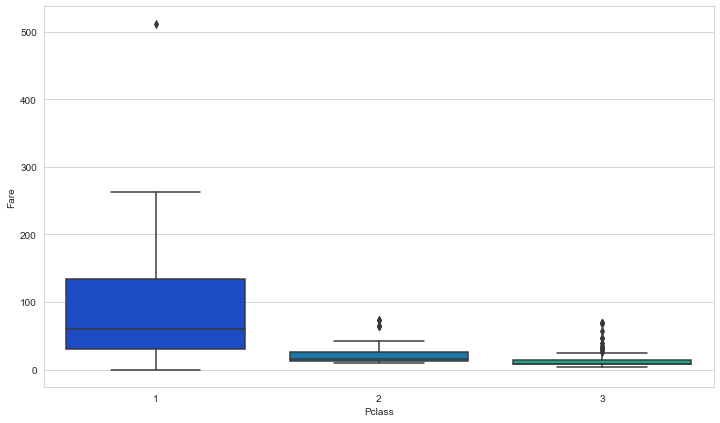

In [62]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Fare',data=train,palette='winter')

In [63]:
def input_Fare(cols):
    Fare=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Fare):
        
        if Pclass==1 :
            return 26.0000
        
        elif Pclass==2:
            return 9.6875
          
         
        else: 
             return 7.0000
    else:
                return Fare

In [64]:
train['Fare']=train[['Fare','Pclass']].apply(input_Fare,axis=1)

<AxesSubplot:>

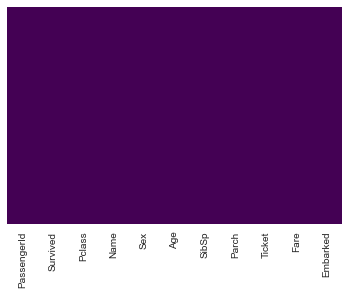

In [65]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [66]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [70]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [71]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [72]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,892,0,3,34.5,0,0,7.8292
1,893,1,3,47.0,1,0,7.0000
2,894,0,2,62.0,0,0,9.6875
3,895,0,3,27.0,0,0,8.6625
4,896,1,3,22.0,1,1,12.2875


In [73]:
train=pd.concat([train,sex,embark],axis=1)

In [74]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,0,3,34.5,0,0,7.8292,1,1,0
1,893,1,3,47.0,1,0,7.0000,0,0,1
2,894,0,2,62.0,0,0,9.6875,1,1,0
3,895,0,3,27.0,0,0,8.6625,1,0,1
4,896,1,3,22.0,1,1,12.2875,0,0,1


In [76]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [78]:
train['Survived'].head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [79]:
from sklearn.model_selection import train_test_split

In [82]:
x_train, x_test, y_train ,y_test =train_test_split(train.drop('Survived',axis=1),
train['Survived'],test_size=0.30,
                                         random_state=101)

In [87]:
from sklearn.linear_model import LogisticRegression

In [89]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

C:\Users\MANSI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [90]:
predictions=logmodel.predict(x_test)

In [91]:
from sklearn.metrics import confusion_matrix

In [92]:
accuracy=confusion_matrix(y_test,predictions)

In [93]:
accuracy

array([[71,  0],
       [ 0, 55]], dtype=int64)

In [94]:
from sklearn.metrics import accuracy_score

In [96]:
acccuracy=accuracy_score(y_test,predictions)
accuracy

array([[71,  0],
       [ 0, 55]], dtype=int64)

In [97]:
predictions

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)